# Ejercicio de Regresion Logistica en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizaran durante el ejercicio.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Carga del archivo csv (datos de entrada)

El archivo csv(por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook,ipynb) y se asigna mediante pandas a la variable dataframe. Al utilizar el metodo de dataframe.head() se visualiza en pantalla los primeros 5 registros.

In [2]:
dataframe =pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el metodo dataframe.describe() que proporcina estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada atributo.

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Se cuantificaran resultados de cada tipo usando la funcion groupby y se visualizan 86 usuarios "Clase 0", es decir windows, 40 usuarios Mac y 44 de Linux.

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos

Se realiza una visualizacion para conocer los atributos caracteristicos de la informacion que se trabaja y su correlacion.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como, "duracion", "paginas", "acciones" y "valor". Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y en que intervalos se concentra la mayor densidad de registros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024148B86488>,
      dtype=object)

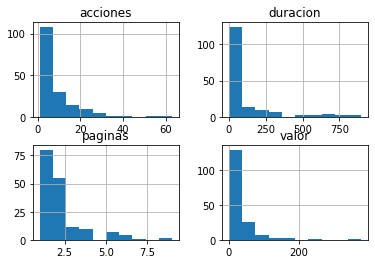

In [5]:
dataframe.drop(['clase'],1).hist()

Ademas se pueden interrelacionar las entradas de pares, para ver como se concentra linealmente las salidas de usuarios por colores: Sistema operativo de windows en azul, Macintosh en verde y Linux en rojo.

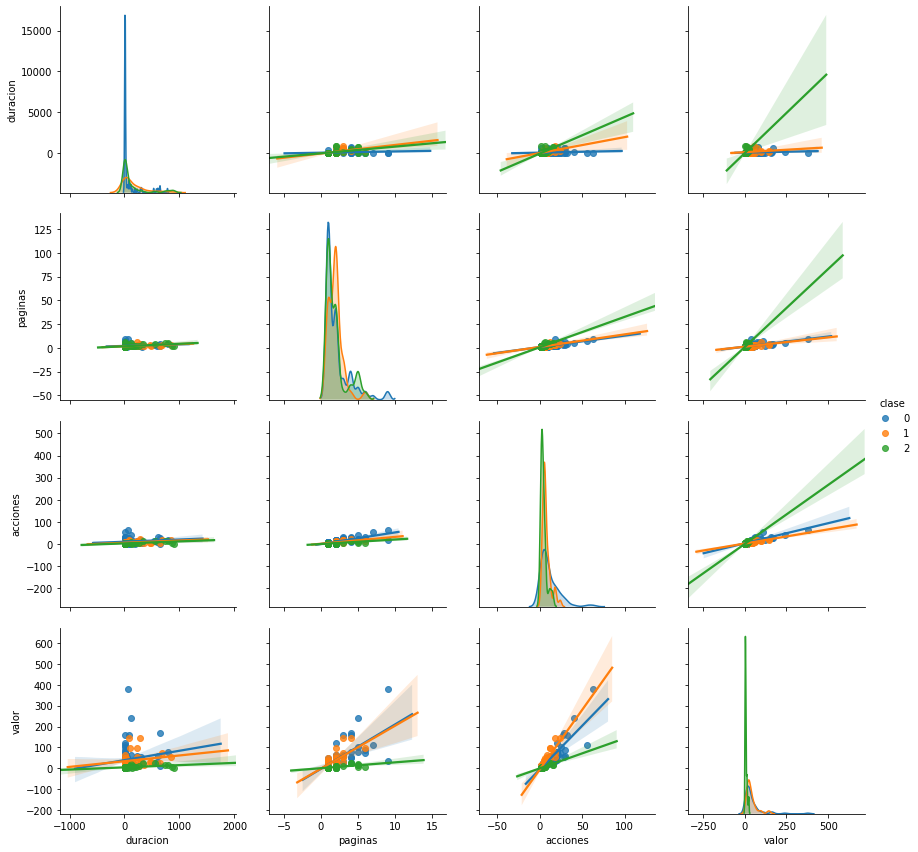

In [6]:
sb.pairplot(dataframe.dropna(),hue='clase',height=3,vars=["duracion", "paginas", "acciones", "valor"],kind='reg')

### Se establece el modelo R Log

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna 'clase' con el metodo drop(). La columna 'clase' se agrega al atributo y, se ejecuta X.shape para comprobar la dimension de la matriz con datos de entrada de 170 registros por 4 columnas.

In [7]:
X= np.array(dataframe.drop(['clase'],1))
y=np.array(dataframe['clase'])
X.shape

(170, 4)

y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunto de entradas X y salidas 'y'.

In [8]:
model=linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasificara todo el conjunto de entradas X utilizando el metodo"predict(X)". Si se revisan algunas de sus salidas se puede ver como coincide con las salidas reales del archivo csv.

In [9]:
predictions=model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


y se confirma el desempeño del modelo utilizado model.score() el cual devuelve la precision media de las predicciones, para este caso del 77%.

In [11]:
model.score(X,y)

0.7764705882352941

### Adicional: Validacion del modelo.

Una buena practica en Machine Learning es la de subdividir el conjunto de datos de entrada en un conjunto de entrenamiento y uno mas para validar el modelo( que no se utiliza durante el entrenamiento y por lo tanto la maquina desconoce). Esto evitara problemas en los que el algoritmo pueda fallar por "sobregeneralizar" el conocimiento.

Para ello, se subdividen los datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para validacion.

In [13]:
validation_size =0.20
seed=7
X_train, X_validation, Y_train, Y_validation=model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Se compila nuevamente el modelo de Regresion Logistica pero esta vez solo con 80% de los datos de entrada y se calcula el nuevo desempeño que ahora registra 74%.

In [18]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.743407 (0.115752)


C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dmore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Se realizan  las predicciones --- clasificacion---utilizando "cross validation set" el conjunto reservado para validacion. En este caso se aprecia que los aciertos fueron del 85% sin olvidar tener en cuenta que el tamaño de datos es pequeño.

In [19]:
predictions= model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


### Reporte de Resultados del Modelo RLog

Finalmente se obtiene la "matriz de confusion" la cual muestra cuantos resultados equivocados tuvo de cada clase(los que no estan en la diagonal): por ejemplo, predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

In [21]:
print(confusion_matrix(Y_validation,predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [22]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



Se ontiene el reporte de clasificacion del conjunto de validacion. En este caso (de un total de 34 registros) se utilizaron como "soporte" 18 registros windows, 6 de mac y 10 de Linux. Se aprecia la precision con que se acertaron cada una de las clases que, por ejemplo, Macintosh tuvo 3 aciertos y -3 fallos (0.5 recall). conviene tener en cuenta que F1-score ofrece una valoracion que toma en cuenta la precision y recall. El promedio de F1-score es de 84% lo cual no esta nada mal

### Clasificacion (o prediccion) de nuevos registros.

Como ultimo ejercicio, se proporcionan datos de entrada de navegacion de un usuario sinteticos y que tiene estos valores:
    


Tiempo duracion: 10 paginas visitadas: 3 Acciones al navegar: 5 Valoracion: 9 lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [25]:
X_new= pd.DataFrame({'duracion': [10],'paginas':[3],'acciones':[5],'valor':[9]})
model.predict(X_new)

array([2], dtype=int64)

Como un extra del ejercicio habra que jugar y varias estos valores para obtener usuarios de tipo de Windows o Macintosh.

En este ejercicio se probo un modelo de Regresion logistica en Python para la clasificacion del uso del sistema operativo por parte de usuarios y a partir de sus caracteristicas de navegacion en un sitio web. De este ejercicio, se podra externer a otro tipos de tareas que pueden surgir durante un trabajo en el que se debe clasificar resultados en valores discretos. Recordar que si se tuvieran que predecir valores continuos, se debera aplicar Regresion Lineal.

Recuerde descargar los archivos para realizar el Ejercicio:

Archivo de Entrada csv (su nombre es usuarios win-mac-lin.csv)
Notebook Jupyter Python (clic derecho y "descargar Archivo como..."); o bien, se puede ver online en Jupyter Notebook Viewer.

Recordatorio:
Si se interesa en aprender algoritmos con Python, existen muchos mas que estan disponibles gratuitos por toda la web en una infinidad de idiomas.